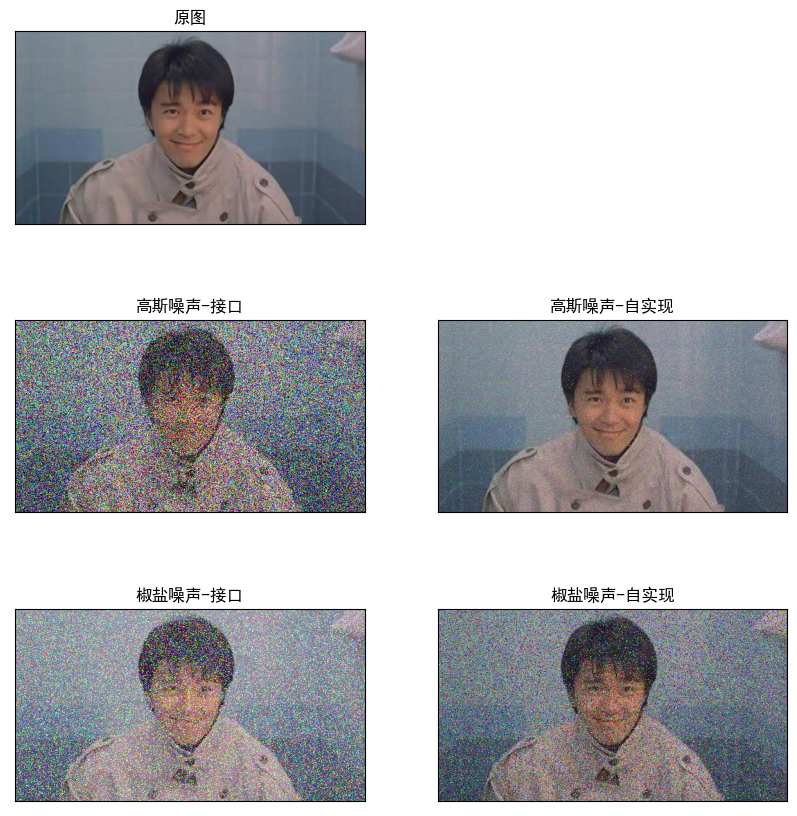

In [94]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from skimage import util
import random
# 原图
image = plt.imread("1.jpg")
plt.figure(figsize=(10, 10)) # 调整图片大小，
plt.subplot(321)
plt.xticks([]) #去除纵横坐标
plt.yticks([])
plt.title("原图")
plt.imshow(image,'gray')
plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文乱码
#-----------------------------------------------------------
# 高斯噪声-调用接口
#image = cv2.imread("1.jpg")
img_noise_gauss = util.random_noise(image, mode='gaussian', seed=None, clip=True, mean=0, var=0.2) # 高斯噪声，方差0.2，均值0。
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5) # 调整子图间距
plt.subplot(323)
plt.xticks([]) #去除纵横坐标
plt.yticks([])
plt.title("高斯噪声-接口")
plt.imshow(img_noise_gauss)
#cv2.imshow("gaosi", img_noise_gauss)
#cv2.waitKey() 
#-----------------------------------------------------------
#高斯噪声-自实现，对单通道进行高斯噪声。
def Gaussian_Noise(src,mean,sigma,percentage):
    image_noise_gaus=src
    NoiseNum=int(percentage*src.shape[0]*src.shape[1]) # 图像中共有多少个噪声点，percentage为百分比
    for i in range(NoiseNum):
        randX=random.randint(0,src.shape[0]-1)# 在0-（src.shape[0]-1）中取随机数
        randY=random.randint(0,src.shape[1]-1)
        #随机生成符合正态（高斯）分布的随机数，mean,sigma为两个参数
        image_noise_gaus[randX,randY]=image_noise_gaus[randX,randY]+random.gauss(mean,sigma) 
        if  image_noise_gaus[randX, randY]< 0:
            image_noise_gaus[randX, randY]=0
        elif image_noise_gaus[randX, randY]>255:
            image_noise_gaus[randX, randY]=255
    return image_noise_gaus

image_src = cv2.imread("1.jpg")
b,g,r = cv2.split(image_src)          #分别提取B、G、R通道   cv2读取的顺序是b,g,r,而plt显示的顺序是r,g,b，所以plt显示会有色差。

b_n = Gaussian_Noise(b,8,16,0.8)
g_n= Gaussian_Noise(g,8,16,0.8)
r_n = Gaussian_Noise(r,8,16,0.8)

image_noise_gaus = cv2.merge([r_n,g_n,b_n])   #重新组合为R、G、B
plt.subplot(324)
plt.xticks([])
plt.yticks([])
plt.title("高斯噪声-自实现")
plt.imshow(image_noise_gaus)

#-----------------------------------------------------------
#椒盐噪声-调用接口
img_noise_salt = util.random_noise(image, mode='salt', seed=None, clip=True, amount = 0.2)# 椒盐占比20%
plt.subplot(325)
plt.xticks([]) #去除纵横坐标
plt.yticks([])
plt.title("椒盐噪声-接口")
plt.imshow(img_noise_salt)
#-----------------------------------------------------------
#椒盐噪声-自实现
def Salt_Noise(src,percentage):
    salt_noise=src
    noisenum=int(percentage*src.shape[0]*src.shape[1])
    for i in range(noisenum):
        randX=random.randint(0,src.shape[0]-1)
        randY=random.randint(0,src.shape[1]-1)
        #random.random生成随机浮点数，随意取到一个像素点有一半的可能是白点255，一半的可能是黑点0
        if random.random()<0.5:
            salt_noise[randX, randY] = 0
        elif random.random()>=0.5:
            salt_noise[randX, randY] = 255
    return salt_noise

b_salt = Salt_Noise(b,0.2)
g_salt= Salt_Noise(g,0.2)
r_salt = Salt_Noise(r,0.2)

image_salt = cv2.merge([r_salt,g_salt,b_salt])   #重新组合为R、G、B

plt.subplot(326)
plt.xticks([])
plt.yticks([])
plt.title("椒盐噪声-自实现")
plt.imshow(image_salt)
